<a href="https://colab.research.google.com/github/capofwesh20/Masters-Thesis/blob/main/TEST_FILE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import os
import ipywidgets as widgets
import random
from IPython.display import display
from PIL import Image, ImageOps
import tifffile as tiff
from skimage.metrics import structural_similarity as compare_ssim
from ipywidgets import widgets, interactive
import plotly.graph_objects as go
import glob
from scipy.stats import pearsonr
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import structural_similarity as compare_ssim
from keras.models import load_model

# **VISUALIZING SYNTHETIC TEST DATA**

# **LOADING MODEL**

In [ ]:
model = load_model('/content/wawa_now_norm1.keras')

# **VISUALIZING LAB TEST DATA**

Rotene

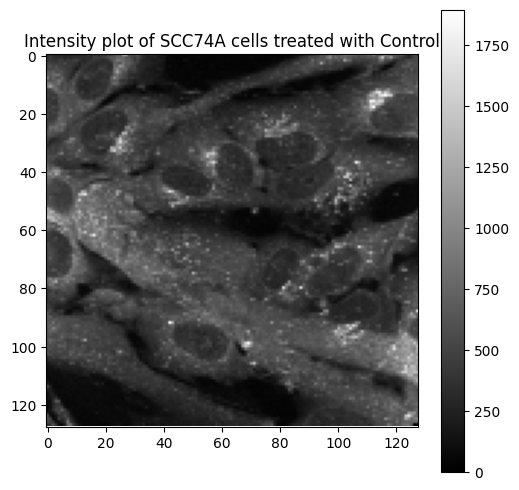

In [ ]:
# Load the image
control_1 = np.load('/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/F++1 Redone_Ch2.npy')

# Sum the intensities along the depth axis to create a 2D projection
intensity = control_1.sum(axis=2)
# Plot the normalized intensity projection
plt.figure(figsize=(6, 6))
plt.imshow(intensity, cmap='grey')
plt.colorbar()
plt.title('Intensity plot of SCC74A cells treated with Control')

plt.show()


In [ ]:
control_1.shape

(128, 128, 256)

**Checking the Maximum and Minimum Pixel value**

# **Creating Tiles**

In [ ]:
def create_tcspc_image_tiles(img, nx, ny):
    # cut up a tcspc image (numpy array) and produce a list of smaller (nx x ny) tcspc image tiles
    h, w, d = img.shape
    image_tiles = [img[i*h//ny:(i+1)*h//ny, j*w//nx:(j+1)*w//nx]
                   for i in range(ny)
                   for j in range(nx)]
    return image_tiles

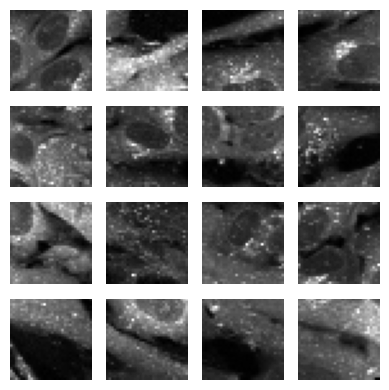

In [ ]:

tiles = create_tcspc_image_tiles(control_1, 4, 4)

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(4, 4))

# Iterate over the tiles and the axes to plot
for ax, tile in zip(axes.ravel(), tiles):
    intensity = tile.sum(axis=2)
    ax.imshow(intensity, cmap='grey')
    ax.axis('off')

plt.tight_layout()
plt.show()



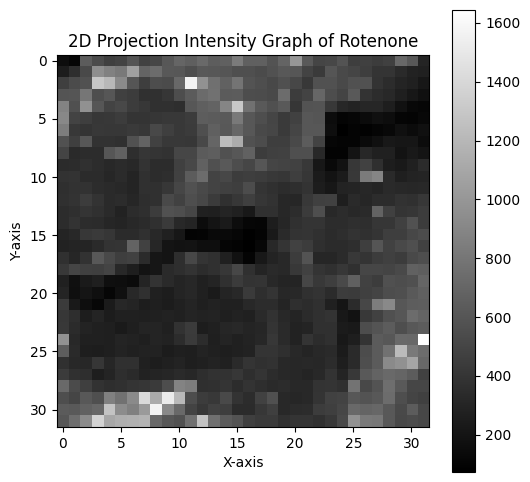

In [ ]:
# Load the image
# Sum the intensities along the depth axis to create a 2D projection
intensity = tiles[11].sum(axis=2)
# Plot the normalized intensity projection
plt.figure(figsize=(6, 6))
plt.imshow(intensity, cmap='grey')
plt.colorbar()
plt.title('2D Projection Intensity Graph of Rotenone')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


# **Performing Interference**

# **Performing Inference on the first tile**

# **Setting the shape in a format that the model accepts**

npy_image

In [ ]:
# Assuming 'normalized_lab_images' is a list of images
predictions = [model.predict(image.reshape(1, 32, 32, 256, 1)) for image in tiles]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


In [ ]:
#predictions

In [ ]:
len(predictions)

16

In [ ]:
t1P_0 = predictions[0][0] # Predicted t1 values
t2P_0 = predictions[0][1] # Predicted t2 values
tRP_0 = predictions[0][2] # Predicted A1 values
off_0 = predictions[0][3] # Predicted offset values

In [ ]:
t1P_1 = predictions[1][0] # Predicted t1 values
t2P_1 = predictions[1][1] # Predicted t2 values
tRP_1 = predictions[1][2] # Predicted AR values
off_1 = predictions[1][3] # Predicted offset values

In [ ]:
t1P_2 = predictions[2][0] # Predicted t1 values
t2P_2 = predictions[2][1] # Predicted t2 values
tRP_2 = predictions[2][2] # Predicted AR values
off_2 = predictions[2][3] # Predicted offset values

In [ ]:
t1P_3 = predictions[3][0] # Predicted t1 values
t2P_3 = predictions[3][1] # Predicted t2 values
tRP_3 = predictions[3][2] # Predicted AR values
off_3 = predictions[3][3] # Predicted offset values

In [ ]:
t1P_4 = predictions[4][0] # Predicted t1 values
t2P_4 = predictions[4][1] # Predicted t2 values
tRP_4 = predictions[4][2] # Predicted AR values
off_4 = predictions[4][3] # Predicted offset values

In [ ]:
t1P_5 = predictions[5][0] # Predicted t1 values
t2P_5 = predictions[5][1] # Predicted t2 values
tRP_5 = predictions[5][2] # Predicted AR values
off_5 = predictions[5][3] # Predicted offset values

In [ ]:
t1P_6 = predictions[6][0] # Predicted t1 values
t2P_6 = predictions[6][1] # Predicted t2 values
tRP_6 = predictions[6][2] # Predicted AR values
off_6 = predictions[6][3] # Predicted offset values

In [ ]:
t1P_7 = predictions[7][0] # Predicted t1 values
t2P_7 = predictions[7][1] # Predicted t2 values
tRP_7 = predictions[7][2] # Predicted AR values
off_7 = predictions[7][3] # Predicted offset values

In [ ]:
t1P_8 = predictions[8][0] # Predicted t1 values
t2P_8 = predictions[8][1] # Predicted t2 values
tRP_8 = predictions[8][2] # Predicted AR values
off_8 = predictions[8][3] # Predicted offset values

In [ ]:
t1P_9 = predictions[9][0] # Predicted t1 values
t2P_9 = predictions[9][1] # Predicted t2 values
tRP_9 = predictions[9][2] # Predicted AR values
off_9 = predictions[9][3] # Predicted offset values

In [ ]:
t1P_10 = predictions[10][0] # Predicted t1 values
t2P_10 = predictions[10][1] # Predicted t2 values
tRP_10 = predictions[10][2] # Predicted AR values
off_10 = predictions[10][3] # Predicted offset values

In [ ]:
t1P_11 = predictions[11][0] # Predicted t1 values
t2P_11 = predictions[11][1] # Predicted t2 values
tRP_11 = predictions[11][2] # Predicted AR values
off_11 = predictions[11][3] # Predicted offset values

In [ ]:
t1P_12 = predictions[12][0] # Predicted t1 values
t2P_12 = predictions[12][1] # Predicted t2 values
tRP_12 = predictions[12][2] # Predicted AR values
off_12 = predictions[12][3] # Predicted offset values

In [ ]:
t1P_13 = predictions[13][0] # Predicted t1 values
t2P_13 = predictions[13][1] # Predicted t2 values
tRP_13 = predictions[13][2] # Predicted AR values
off_13 = predictions[13][3] # Predicted offset values

In [ ]:
t1P_14 = predictions[14][0] # Predicted t1 values
t2P_14 = predictions[14][1] # Predicted t2 values
tRP_14 = predictions[14][2] # Predicted AR values
off_14 = predictions[14][3] # Predicted offset values

In [ ]:
t1P_15 = predictions[15][0] # Predicted t1 values
t2P_15 = predictions[15][1] # Predicted t2 values
tRP_15 = predictions[15][2] # Predicted AR values
off_15 = predictions[15][3] # Predicted offset values

In [ ]:

def stitch_image_tiles(tiles, nx, ny):

    tile_height, tile_width = squeezed_tiles_t1P[0].shape
    h = tile_height * ny
    w = tile_width * nx
    stitched_image = np.zeros((h, w), dtype=tiles[0].dtype)

    for i in range(ny):
        for j in range(nx):
            start_row = i * tile_height
            end_row = start_row + tile_height
            start_col = j * tile_width
            end_col = start_col + tile_width
            stitched_image[start_row:end_row, start_col:end_col] = tiles[i*nx + j]

    return stitched_image



In [ ]:
# Assuming t1P_0 to t1P_15 are defined somewhere else in your code

# Create a list of your tiles
tiles = [t1P_0, t1P_1, t1P_2, t1P_3, t1P_4, t1P_5, t1P_6, t1P_7,
         t1P_8, t1P_9, t1P_10, t1P_11, t1P_12, t1P_13, t1P_14, t1P_15]

# Use a list comprehension to squeeze all tiles
squeezed_tiles_t1P = [tile.squeeze() for tile in tiles]



In [ ]:
# Assuming t2P_0 to t2P_15 are defined somewhere else in your code

# Create a list of your tiles
tiles_2 = [t2P_0, t2P_1, t2P_2, t2P_3, t2P_4, t2P_5, t2P_6, t2P_7,
         t2P_8, t2P_9, t2P_10, t2P_11, t2P_12, t2P_13, t2P_14, t2P_15]

# Use a list comprehension to squeeze all tiles
squeezed_tiles_t2P = [tile.squeeze() for tile in tiles_2]




In [ ]:
# Assuming tRP_0 to tRP_15 are defined somewhere else in your code

# Create a list of your tiles
tiles_3 = [tRP_0, tRP_1, tRP_2, tRP_3, tRP_4, tRP_5, tRP_6, tRP_7,
         tRP_8, tRP_9, tRP_10, tRP_11, tRP_12, tRP_13, tRP_14, tRP_15]

# Use a list comprehension to squeeze all tiles
squeezed_tiles_tRP = [tile.squeeze() for tile in tiles_3]


In [ ]:
tiles_4 = [off_0, off_1, off_2, off_3, off_4, off_5, off_6, off_7,
         off_8, off_9, off_10, off_11, off_12, off_13, off_14, off_15]

squeezed_tiles_off = [tile.squeeze() for tile in tiles_4]

In [ ]:
stitched_image_1 = stitch_image_tiles(squeezed_tiles_t1P, 4, 4)

In [ ]:
stitched_image_2 = stitch_image_tiles(squeezed_tiles_t2P, 4, 4)

In [ ]:
stitched_image_3 = stitch_image_tiles(squeezed_tiles_tRP, 4, 4)

In [ ]:
stitched_image_4 = stitch_image_tiles(squeezed_tiles_off, 4, 4)

In [ ]:
stitched_image_4.shape

(128, 128)

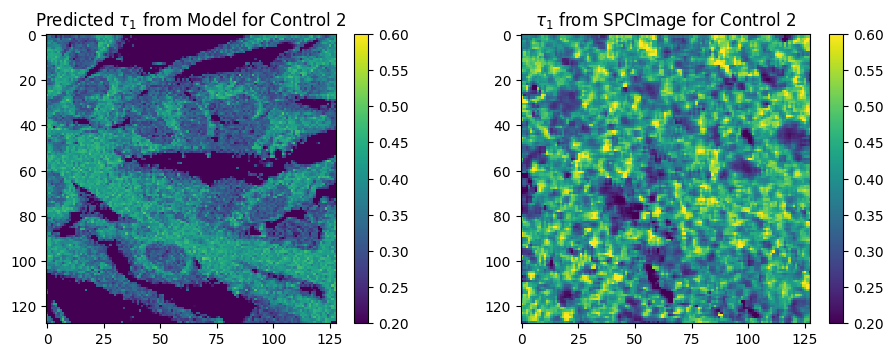

In [ ]:

fig = plt.figure(figsize=(10,10))

# Predicted tau1
ax1 = fig.add_subplot(3,2,1)
im1 = ax1.imshow(stitched_image_1, cmap='viridis', interpolation='nearest', vmin=.2, vmax=.6)
ax1.set_title(r'Predicted $\tau_1$ from Model for Control 2')
fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

# G.T. tau1
ax2 = fig.add_subplot(3,2,2)
im2 = ax2.imshow(loaded_data, cmap='viridis', interpolation='nearest', vmin=.2, vmax=.6)
ax2.set_title(r'$\tau_1$ from SPCImage for Control 2')
fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)



plt.tight_layout()
plt.show()


In [ ]:
stitched_image_1 = stitched_image_1.astype(np.float64)  # Convert im1 to float64

ssim_score = compare_ssim(loaded_data, stitched_image_1, data_range=loaded_data.max() - loaded_data.min())

print(f"SSIM for the image is: {ssim_score}")



SSIM for the image is: 0.05480201469128859


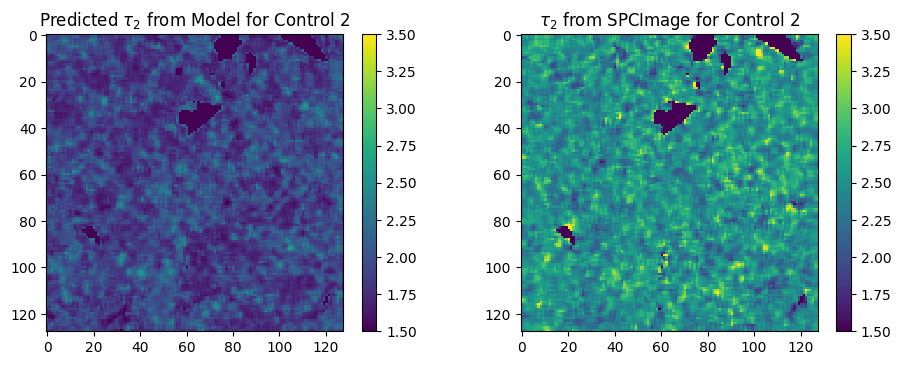

In [ ]:

fig = plt.figure(figsize=(10,10))
# Predicted tau2
ax3 = fig.add_subplot(3,2,3)
im3 = ax3.imshow(stitched_image_2, cmap='viridis', interpolation='nearest', vmin=1.5, vmax=3.5)
ax3.set_title(r'Predicted $\tau_2$ from Model for Control 2')
fig.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)


# G.T. tau2
ax4 = fig.add_subplot(3,2,4)
im4 = ax4.imshow(loaded_data_2, cmap='viridis', interpolation='nearest', vmin=1.5, vmax=3.5)
ax4.set_title(r'$\tau_2$ from SPCImage for Control 2')
fig.colorbar(im4, ax=ax4, fraction=0.046, pad=0.04)


plt.tight_layout()
plt.show()


In [ ]:
stitched_image_2 = stitched_image_2.astype(np.float64)  # Convert im1 to float64

ssim_score = compare_ssim(loaded_data_2, stitched_image_2, data_range=loaded_data_2.max() - loaded_data_2.min())

print(f"SSIM for the image is: {ssim_score}")



SSIM for the image is: 0.13104622817587233


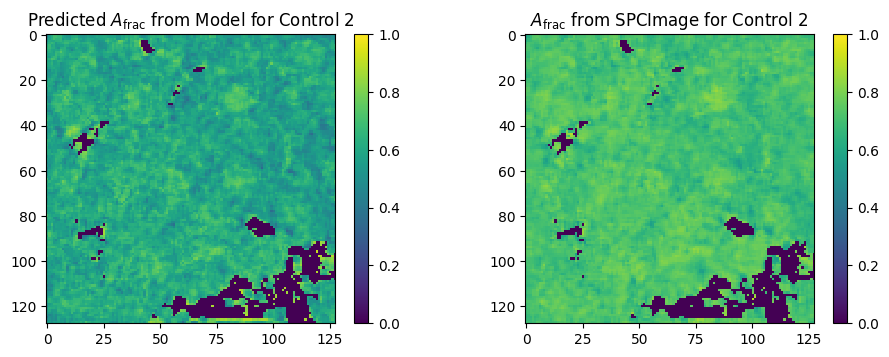

In [ ]:

fig = plt.figure(figsize=(10,10))

# Predicted AR
ax5 = fig.add_subplot(3,2,5)
im5 = ax5.imshow(stitched_image_3, cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
ax5.set_title(r'Predicted $A_{\text{frac}}$ from Model for Control 2')
fig.colorbar(im5, ax=ax5, fraction=0.046, pad=0.04)


# G.T. tau1
ax6 = fig.add_subplot(3,2,6)
im6 = ax6.imshow(loaded_data_a1, cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
ax6.set_title(r'$A_{\text{frac}}$ from SPCImage for Control 2')
fig.colorbar(im6, ax=ax6, fraction=0.046, pad=0.04)



plt.tight_layout()
plt.show()

In [ ]:
stitched_image_3 = stitched_image_3.astype(np.float64)  # Convert im1 to float64

ssim_score = compare_ssim(loaded_data_a1, stitched_image_3, data_range=loaded_data_a1.max() - loaded_data_a1.min())

print(f"SSIM for the image is: {ssim_score}")



SSIM for the image is: 0.5725408207633469


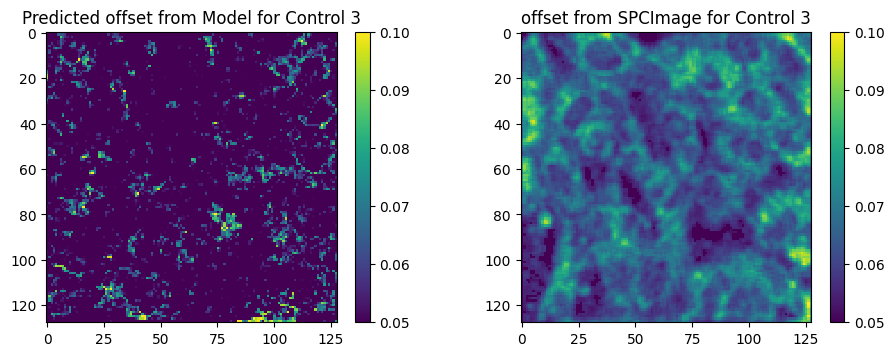

In [ ]:

fig = plt.figure(figsize=(10,10))

# Predicted AR
ax5 = fig.add_subplot(3,2,5)
im5 = ax5.imshow(stitched_image_4, cmap='viridis', interpolation='nearest', vmin=0.05, vmax=0.1)
ax5.set_title(r'Predicted offset from Model for Control 3')
fig.colorbar(im5, ax=ax5, fraction=0.046, pad=0.04)
# G.T. tau1
ax6 = fig.add_subplot(3,2,6)
im6 = ax6.imshow(loaded_data_off, cmap='viridis', interpolation='nearest', vmin=0.05, vmax=0.1)
ax6.set_title(r'offset from SPCImage for Control 3')
fig.colorbar(im6, ax=ax6, fraction=0.046, pad=0.04)



plt.tight_layout()
plt.show()

In [ ]:
stitched_image_off = stitched_image_4.astype(np.float64)  # Convert im1 to float64

ssim_score = compare_ssim(rescaled_image, stitched_image_off, data_range=rescaled_image.max() - rescaled_image.min())

print(f"SSIM for the image is: {ssim_score}")

SSIM for the image is: -0.028202086799418297


In [ ]:
loaded_data = np.load('/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/F++6 Redone_t1.npy')
#loaded_data = loaded_data/1000
print(loaded_data)


[[0.336632 0.359517 0.392367 ... 0.511236 0.518817 0.508975]
 [0.373285 0.381981 0.375161 ... 0.490022 0.518141 0.520323]
 [0.341373 0.361832 0.343505 ... 0.552965 0.603365 0.581435]
 ...
 [0.405247 0.433535 0.466324 ... 0.433979 0.455395 0.447038]
 [0.37627  0.418139 0.453484 ... 0.482801 0.488272 0.463264]
 [0.255389 0.284301 0.32774  ... 0.490333 0.453969 0.407716]]


In [ ]:
loaded_data.min()

0.0

In [ ]:
loaded_data_2 = np.load('/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/F++6 Redone_t2.npy')
#loaded_data_2 = loaded_data_2/1000
print(loaded_data_2)

[[2.00628 2.13329 2.18964 ... 2.42939 2.95467 3.06002]
 [2.20669 2.29479 2.17125 ... 2.25185 2.67649 2.79612]
 [2.26578 2.29074 2.12322 ... 2.39229 2.87498 2.95629]
 ...
 [2.04307 2.34728 2.5697  ... 2.497   2.68785 2.80055]
 [2.07964 2.4112  2.45215 ... 2.5055  2.46183 2.50951]
 [1.94854 2.24462 2.30995 ... 2.40501 2.37994 2.43577]]


In [ ]:
loaded_data_2.max()

6.37638

In [ ]:
loaded_data_a1 = np.load('/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/F++1_ratio.npy')
#loaded_data_a1 = loaded_data_a1/100
loaded_data_a1

array([[0.71238794, 0.74593441, 0.73198276, ..., 0.65108417, 0.64726386,
        0.65362716],
       [0.75281309, 0.75836904, 0.76415732, ..., 0.64587318, 0.64706034,
        0.66606102],
       [0.71003212, 0.71220057, 0.74239986, ..., 0.64469325, 0.64543078,
        0.67388468],
       ...,
       [0.67778891, 0.71065752, 0.64149337, ..., 0.78315666, 0.75765794,
        0.75431302],
       [0.67004572, 0.72956561, 0.73009051, ..., 0.70456538, 0.73556149,
        0.74785306],
       [0.71844444, 0.75429591, 0.75949946, ..., 0.72648988, 0.75801664,
        0.7472154 ]])

In [ ]:
image = np.load('/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/F++1 Redone_offset.npy')

# Define old and new ranges
old_min, old_max = 0, image.max()
new_min, new_max = 0.05, 0.1

# Rescale the image
rescaled_image = new_min + ((image - old_min) / (old_max - old_min)) * (new_max - new_min)


In [ ]:
rescaled_image.max()

0.1

In [ ]:
a2_mask = (rescaled_image > 0)
#nzeropixels_a1 = np.sum(a1_mask)
nzeropixels_a2 = np.sum(a2_mask)

#compare the number of zero pixels in the a1 and a2 files...they are the same (443)
np.sum(rescaled_image == 0)

0